In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.svm import SVR,SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,roc_auc_score,roc_curve,precision_recall_curve,r2_score
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV,RandomizedSearchCV
import shutil
import graphviz
import dtreeviz


In [3]:
# 读取数据
data = pd.read_csv(r'C:\Users\Runker\Desktop\test\ph_result.csv')
print(len(data))
# 删除有缺失值的行
data.dropna(inplace=True)
len(data),data.columns

6805


(6805,
 Index(['LON', 'LAT', 'ASP', 'CUR', 'DEM', 'DL', 'DZ', 'NDVI', 'NIGTH', 'PH',
        'PLCUR', 'POCUR', 'PRE', 'SLOP', 'SOILQS', 'TMP', 'TPI101', 'TPI11',
        'TPI201', 'TPI3', 'TWI'],
       dtype='object'))

In [8]:
features = ['LON', 'LAT', 'ASP', 'CUR', 'DEM', 'NDVI', 'NIGTH', 'PH','PLCUR', 'POCUR', 'PRE', 'SLOP', 'SOILQS', 'TMP', 'TPI101', 'TPI11','TPI201', 'TPI3', 'TWI']

In [9]:
data = data[features]
# data = data.rename({"SC2": "SC"}, axis=1)
data

,LON,LAT,ASP,CUR,DEM,NDVI,NIGTH,PH,PLCUR,POCUR,PRE,SLOP,SOILQS,TMP,TPI101,TPI11,TPI201,TPI3,TWI
0,407891.5922,3089823.370,95.195572,-0.399902,859.200012,305,0.44,6.89,0.000000,0.399902,808.666687,1.581960,11,159.083328,-7.234863,-0.008179,-34.929260,0.000794,10.361465
1,408073.3197,3089689.435,225.000000,0.000000,860.700012,305,0.44,6.97,0.000000,0.000000,808.666687,0.405160,11,159.083328,-11.281555,-0.013916,-34.872925,0.003479,10.107209
2,404319.5760,3089004.085,254.744080,0.400635,981.900024,3022,0.51,6.16,0.055485,-0.345150,812.000000,3.262861,11,152.666672,-2.516785,-0.235535,-7.492310,-0.019470,8.234723
3,404534.1358,3088889.681,224.999390,-2.800293,982.299988,3022,1.99,5.29,-1.912729,0.887564,809.333313,11.393971,11,156.416672,16.513123,-0.686340,23.088379,-0.041321,6.055318
4,407910.5926,3089414.906,103.567131,-1.199951,870.500000,305,0.52,6.02,-0.037713,1.162238,808.666687,4.265323,11,159.083328,-1.748047,-0.055908,-23.163269,-0.017090,6.684364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6800,413154.7470,3151684.015,33.997498,0.399902,1262.000000,172,0.24,5.45,0.099266,-0.300636,880.750000,7.388097,12,131.333328,6.687012,0.300049,-13.811035,-0.001953,5.633852
6801,413501.3119,3151629.372,34.695072,6.799805,1212.000000,7110,0.17,6.05,5.227324,-1.572480,877.500000,15.466873,12,134.000000,-20.178101,-0.438843,-43.349854,-0.040527,3.749358
6802,414850.2258,3151562.076,74.147934,-0.799316,1231.900024,6073,0.24,4.59,0.547053,1.346369,876.750000,11.887654,13,135.583328,20.079712,0.385254,35.971069,0.021973,4.638661
6803,415155.1013,3151693.570,63.435486,-0.399414,1178.800049,6073,0.25,4.99,-1.467510,-1.068095,871.083313,16.208702,13,139.333328,6.350464,0.354492,13.728271,0.036133,5.042575


In [11]:
data.drop_duplicates(inplace=True)
data

C:\Users\Runker\AppData\Local\Temp\ipykernel_2964\213383468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,LON,LAT,ASP,CUR,DEM,NDVI,NIGTH,PH,PLCUR,POCUR,PRE,SLOP,SOILQS,TMP,TPI101,TPI11,TPI201,TPI3,TWI
0,407891.5922,3089823.370,95.195572,-0.399902,859.200012,305,0.44,6.89,0.000000,0.399902,808.666687,1.581960,11,159.083328,-7.234863,-0.008179,-34.929260,0.000794,10.361465
1,408073.3197,3089689.435,225.000000,0.000000,860.700012,305,0.44,6.97,0.000000,0.000000,808.666687,0.405160,11,159.083328,-11.281555,-0.013916,-34.872925,0.003479,10.107209
2,404319.5760,3089004.085,254.744080,0.400635,981.900024,3022,0.51,6.16,0.055485,-0.345150,812.000000,3.262861,11,152.666672,-2.516785,-0.235535,-7.492310,-0.019470,8.234723
3,404534.1358,3088889.681,224.999390,-2.800293,982.299988,3022,1.99,5.29,-1.912729,0.887564,809.333313,11.393971,11,156.416672,16.513123,-0.686340,23.088379,-0.041321,6.055318
4,407910.5926,3089414.906,103.567131,-1.199951,870.500000,305,0.52,6.02,-0.037713,1.162238,808.666687,4.265323,11,159.083328,-1.748047,-0.055908,-23.163269,-0.017090,6.684364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6800,413154.7470,3151684.015,33.997498,0.399902,1262.000000,172,0.24,5.45,0.099266,-0.300636,880.750000,7.388097,12,131.333328,6.687012,0.300049,-13.811035,-0.001953,5.633852
6801,413501.3119,3151629.372,34.695072,6.799805,1212.000000,7110,0.17,6.05,5.227324,-1.572480,877.500000,15.466873,12,134.000000,-20.178101,-0.438843,-43.349854,-0.040527,3.749358
6802,414850.2258,3151562.076,74.147934,-0.799316,1231.900024,6073,0.24,4.59,0.547053,1.346369,876.750000,11.887654,13,135.583328,20.079712,0.385254,35.971069,0.021973,4.638661
6803,415155.1013,3151693.570,63.435486,-0.399414,1178.800049,6073,0.25,4.99,-1.467510,-1.068095,871.083313,16.208702,13,139.333328,6.350464,0.354492,13.728271,0.036133,5.042575


In [12]:
data.dtypes

LON       float64
LAT       float64
ASP       float64
CUR       float64
DEM       float64
NDVI        int64
NIGTH     float64
PH        float64
PLCUR     float64
POCUR     float64
PRE       float64
SLOP      float64
SOILQS      int64
TMP       float64
TPI101    float64
TPI11     float64
TPI201    float64
TPI3      float64
TWI       float64
dtype: object

In [13]:
X = data.drop(columns='PH')
y = data['PH']

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [27]:
# 定义随机森林超参数的取值范围
param_dist = {
    'n_estimators': np.arange(10, 2001, 10),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None] + list(np.arange(1, 21)),
    'min_samples_split': np.arange(2, 21),
    'min_samples_leaf': np.arange(1, 21),
    'bootstrap': [True, False]
}

# 创建随机森林分类器
clf = RandomForestRegressor()

# 使用RandomizedSearchCV来寻找最佳参数
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=100, cv=5, verbose=1, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# 打印最佳参数
print('Best Parameters: \n', random_search.best_params_)

# 使用最佳参数对测试集进行评估
best_clf = random_search.best_estimator_
score = best_clf.score(X_test, y_test)
print('Test accuracy:', score)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: 
 {'n_estimators': 830, 'min_samples_split': 11, 'min_samples_leaf': 7, 'max_features': 'log2', 'max_depth': 20, 'bootstrap': False}
Test accuracy: 0.39123868998980826


In [43]:
rf = RandomForestRegressor(n_estimators=1000,random_state=52)
rf.fit(X_train,y_train)
y_test_pred = rf.predict(X_test)
r2_score(y_test,y_test_pred)

0.39430868140228315

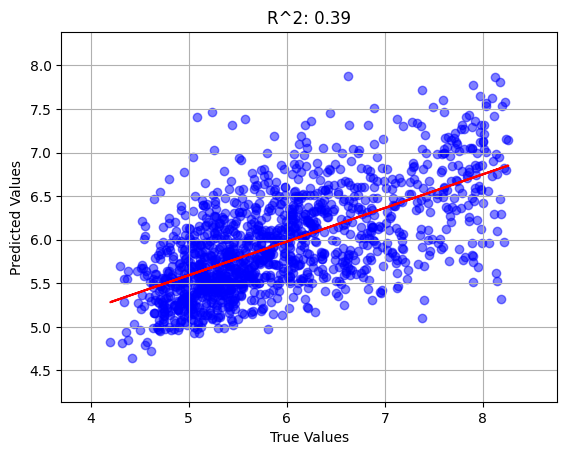

In [47]:
r2 = r2_score(y_test,y_test_pred)
# 画图
plt.scatter(y_test, y_test_pred, c='b', alpha=0.5)

fit = np.polyfit(y_test, y_test_pred, deg=1)
fit_fn = np.poly1d(fit) 
plt.plot(y_test, fit_fn(y_test), c='r')

plt.xlim([min(y_test)-0.5, max(y_test)+0.5])
plt.ylim([min(y_test_pred)-0.5, max(y_test_pred)+0.5])
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('R^2: %.2f' % r2)
plt.grid()

plt.show()

In [38]:
from catboost import CatBoostRegressor
ct = CatBoostRegressor()

In [39]:
ct.fit(X_train,y_train)

Learning rate set to 0.053512
0:	learn: 0.9318354	total: 1.96ms	remaining: 1.96s
1:	learn: 0.9210306	total: 3.81ms	remaining: 1.9s
2:	learn: 0.9104660	total: 5.53ms	remaining: 1.84s
3:	learn: 0.9002642	total: 7.27ms	remaining: 1.81s
4:	learn: 0.8907837	total: 8.92ms	remaining: 1.77s
5:	learn: 0.8835868	total: 10.6ms	remaining: 1.76s
6:	learn: 0.8759351	total: 12ms	remaining: 1.71s
7:	learn: 0.8692538	total: 13.7ms	remaining: 1.7s
8:	learn: 0.8623116	total: 15.1ms	remaining: 1.67s
9:	learn: 0.8566058	total: 16.6ms	remaining: 1.64s
10:	learn: 0.8506878	total: 17.8ms	remaining: 1.6s
11:	learn: 0.8453538	total: 19ms	remaining: 1.57s
12:	learn: 0.8406830	total: 20.5ms	remaining: 1.55s
13:	learn: 0.8359622	total: 21.8ms	remaining: 1.53s
14:	learn: 0.8317449	total: 23.1ms	remaining: 1.51s
15:	learn: 0.8274692	total: 24.4ms	remaining: 1.5s
16:	learn: 0.8232788	total: 25.6ms	remaining: 1.48s
17:	learn: 0.8194245	total: 26.9ms	remaining: 1.47s
18:	learn: 0.8156052	total: 28.1ms	remaining: 1.45s


In [40]:
y_pred = ct.predict(X_test)
r2_score(y_test,y_pred)

0.4145087309766474

In [42]:
# 定义超参数
params = {'iterations': 10000, 
          'learning_rate': 0.05,
          'random_seed': 0,
          'allow_writing_files': False,
          'eval_metric': 'R2'}

# 创建模型对象并传入超参数
model = CatBoostRegressor(**params) 

# 训练模型
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2_score(y_test,y_pred)

0:	learn: 0.0244915	total: 2ms	remaining: 20s
1:	learn: 0.0456375	total: 3.84ms	remaining: 19.2s
2:	learn: 0.0661539	total: 5.77ms	remaining: 19.2s
3:	learn: 0.0858673	total: 7.65ms	remaining: 19.1s
4:	learn: 0.1040879	total: 9.15ms	remaining: 18.3s
5:	learn: 0.1192020	total: 10.9ms	remaining: 18.1s
6:	learn: 0.1352708	total: 12.8ms	remaining: 18.3s
7:	learn: 0.1478605	total: 14.9ms	remaining: 18.7s
8:	learn: 0.1605252	total: 16.8ms	remaining: 18.7s
9:	learn: 0.1728965	total: 18.6ms	remaining: 18.6s
10:	learn: 0.1838087	total: 20.2ms	remaining: 18.4s
11:	learn: 0.1937039	total: 21.7ms	remaining: 18.1s
12:	learn: 0.2023469	total: 23ms	remaining: 17.7s
13:	learn: 0.2115588	total: 24.3ms	remaining: 17.3s
14:	learn: 0.2187929	total: 25.7ms	remaining: 17.1s
15:	learn: 0.2264592	total: 27.1ms	remaining: 16.9s
16:	learn: 0.2346731	total: 28.5ms	remaining: 16.7s
17:	learn: 0.2415567	total: 29.9ms	remaining: 16.6s
18:	learn: 0.2483861	total: 31.3ms	remaining: 16.5s
19:	learn: 0.2552286	total: 3

0.3948655956274333